## Import some helpful libraries

In [1]:
print("    Version control\n------------------------")
import os     # operating system interfaces
import fnmatch
import random
import datetime
import numpy as np;              print("Numpy\t\t", np.__version__)
import matplotlib as mpl;        print("matplotlib\t", mpl.__version__)
import matplotlib.pyplot as plt
import nibabel as nib;           print("NiBabel\t\t {}".format(nib.__version__))
from nibabel.testing import data_path
import math
import pandas as pd;             print("Pandas\t\t {}".format(pd.__version__))
import sys
import imageio;                  print("imageio\t\t {}".format(imageio.__version__))
import h5py;                     print("H5py\t\t {}".format(h5py.__version__))
import sklearn;                  print("Scikit-learn\t {}".format(sklearn.__version__))
import skimage;                  print("Scikit-image\t {}".format(skimage.__version__))
import tensorflow as tf;         print("TensorFlow\t {}".format(tf.__version__))
import keras as K;               print("Keras\t\t {}".format(K.__version__))
from tensorflow.keras import models, Input, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, BatchNormalization, Conv3D, MaxPooling3D, UpSampling3D
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import TensorBoard, EarlyStopping

    Version control
------------------------
Numpy		 1.19.4
matplotlib	 3.3.3
NiBabel		 3.2.0
Pandas		 1.1.4
imageio		 2.9.0
H5py		 2.10.0
Scikit-learn	 0.23.2
Scikit-image	 0.17.2
TensorFlow	 2.3.1
Keras		 2.3.1


Using TensorFlow backend.


## Loading Dataset: Training and Validation Datasets (randomly)

In [8]:
## Loading dataset from path directory

print(os.getcwd())     # '/Users/shossein/GitHub/DTI_Clustering'
dirpath = os.chdir("/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 
sample_all = []
for sample in fnmatch.filter(os.listdir(dirpath), 'Pat_*_1-post.nii.gz'):
    sample_all.append(sample)
sample_num = len(sample_all)
print("There are totaly", sample_num, "samples.\n")
sample_all.sort()
# print(*sample_all, sep='\t')

## Deviding all samples into two groups: Training and Validation datasets randomly

sample_val = random.sample(sample_all, 24)
sample_val.sort()
print("\n", len(sample_val), "Validation samples are:\n")
# print(*sample_val, sep='\t')

sample_val_subset = sample_val [0:24]
print("\n", len(sample_val_subset), " subset of Validation samples are:\n")
print(*sample_val_subset, sep='\t')

sample_train = [x for x in sample_all if x not in sample_val]
sample_train.sort()
print("\n--------------------------------------------------------------------------------\n\n", len(sample_train), "Training samples are:\n")
# print(*sample_train, sep='\t')

sample_train_subset = sample_train [0:100]
print("\n", len(sample_train_subset), " subset of Validation samples are:\n")
print(*sample_train_subset, sep='\t')

/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI

Directory is changed into:
 /Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI 

There are totaly 124 samples.


 24 Validation samples are:


 24  subset of Validation samples are:

Pat_101_1-post.nii.gz	Pat_115_1-post.nii.gz	Pat_126_1-post.nii.gz	Pat_132_1-post.nii.gz	Pat_137_1-post.nii.gz	Pat_140_1-post.nii.gz	Pat_144_1-post.nii.gz	Pat_24_1-post.nii.gz	Pat_29_1-post.nii.gz	Pat_33_1-post.nii.gz	Pat_39_1-post.nii.gz	Pat_47_1-post.nii.gz	Pat_49_1-post.nii.gz	Pat_51_1-post.nii.gz	Pat_53_1-post.nii.gz	Pat_57_1-post.nii.gz	Pat_59_1-post.nii.gz	Pat_73_1-post.nii.gz	Pat_85_1-post.nii.gz	Pat_89_1-post.nii.gz	Pat_8_1-post.nii.gz	Pat_93_1-post.nii.gz	Pat_99_1-post.nii.gz	Pat_9_1-post.nii.gz

--------------------------------------------------------------------------------

 100 Training samples are:


 100  subset of Validation samples are:

Pat_100_1-post.nii.gz	Pat_102_1-p

## Pack Train samples together

In [9]:
## Combine all Training dateset together

train_data = np.zeros((1, 182, 218, 182, 1))

sample_train = sample_train_subset            

for sample in sample_train_subset:
#     print(sample)
    img = nib.load(sample)
    img_np = np.asanyarray(img.dataobj)         # Convert data into Numpy array format
    data_64 = np.float64(img_np)                # Convert numpayed data back into the original float64
    data_reshape = np.reshape(data_64, (1, 182, 218, 182, 1))
    train_data = np.concatenate((train_data, data_reshape), axis=0)
train_data = np.delete(train_data, 0, axis=0)
print("Shape of training dataset:", train_data.shape)

Shape of training dataset: (100, 182, 218, 182, 1)


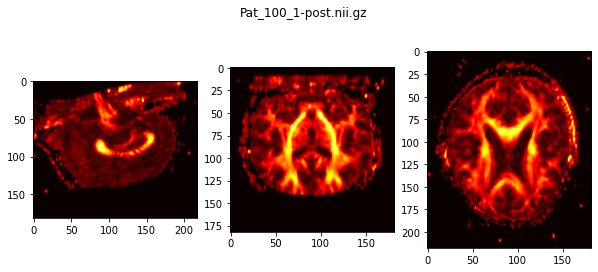

In [10]:
## Showing one or all Training samples in three dimension (one middle slice per each dimension)

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices), figsize=(10,5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="hot", origin="upper") # hot, Greys, gray
        
# for m in range(train_data.shape[0]):
for m in range(1):
    slice_0 = train_data[m, 91, :, :, 0]
    slice_1 = train_data[m, :, 109, :, 0]
    slice_2 = train_data[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_train_subset[m], x=0.5, y=0.9)

In [11]:
## Rescale Training dataset into [0:1]

sample_spec = 2      # A specific sample to show the min and max of that 
print("Range of a sample of original training data:\tMin=", np.min(train_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(train_data[sample_spec, :, :, :, 0]), "\n")
for m in range(train_data.shape[0]):
    for x in range(train_data.shape[1]):
        for y in range(train_data.shape[2]):
            for z in range(train_data.shape[3]):
                if train_data[m,x,y,z] <= 0: train_data[m,x,y,z] = 0
                if train_data[m,x,y,z] > 1: train_data[m,x,y,z] = 1
print("Range of a sample of original data:\t\tMin=", np.min(train_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(train_data[sample_spec, :, :, :, 0]), "\n")

Range of a sample of original training data:	Min= -0.0010085757821798325 ,   Max= 0.976529061794281 

Range of a sample of original data:		Min= 0.0 ,   Max= 0.976529061794281 



In [12]:
print(os.getcwd())     # "/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI"
dirpath = os.chdir("/Users/shossein/GitHub/DTI_Clustering")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 

/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI

Directory is changed into:
 /Users/shossein/GitHub/DTI_Clustering 



In [13]:
## Save data
open('train_100_new.npy', 'wb')
np.save('train_100_new.npy', train_data)

## Save train sample names
open('train_100_new_sample_name.csv', 'w')
np.savetxt("train_100_new_sample_name.csv", sample_train_subset, fmt="%s", delimiter=",")

In [14]:
## load data
sample_train_subset = np.loadtxt("train_100_new_sample_name.csv", dtype=str, delimiter=",")
train_data = np.load('train_100_new.npy').reshape(100,182,218,182,1)
train_data.shape

(100, 182, 218, 182, 1)

## Pack Valid samples together

In [15]:
## Combine all Validation dateset together

print(os.getcwd())     # '/Users/shossein/GitHub/DTI_Clustering'
dirpath = os.chdir("/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 
valid_data = np.zeros((1, 182, 218, 182, 1))

sample_val = sample_val_subset            # To test in CPU based computer

for sample in sample_val_subset:
#     print(sample)
    img = nib.load(sample)
    img_np = np.asanyarray(img.dataobj)         # Convert data into Numpy array format
    data_64 = np.float64(img_np)                # Convert numpayed data back into the original float64
    data_reshape = np.reshape(data_64, (1, 182, 218, 182, 1))
    valid_data = np.concatenate((valid_data, data_reshape), axis=0)
valid_data = np.delete(valid_data, 0, axis=0)
print("Shape of validation dataset:", valid_data.shape)

/Users/shossein/GitHub/DTI_Clustering

Directory is changed into:
 /Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI 

Shape of validation dataset: (24, 182, 218, 182, 1)


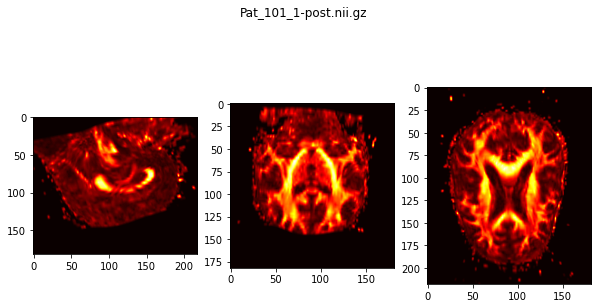

In [16]:
## Showing one or all Validation samples in three dimension (one middle slice per each dimension)

# for m in range(valid_data.shape[0]):
for m in range(1):
    slice_0 = valid_data[m, 91, :, :, 0]
    slice_1 = valid_data[m, :, 109, :, 0]
    slice_2 = valid_data[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_val_subset[m], x=0.5, y=1)

In [17]:
## Rescale Validation dataset into [0:1]

sample_spec = 2      # A specific sample to show the min and max of that 

print("Range of a sample of original validation data:\tMin=", np.min(valid_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(valid_data[sample_spec, :, :, :, 0]), "\n")
for m in range(valid_data.shape[0]):
    for x in range(valid_data.shape[1]):
        for y in range(valid_data.shape[2]):
            for z in range(valid_data.shape[3]):
                if valid_data[m,x,y,z] <= 0: valid_data[m,x,y,z] = 0
                if valid_data[m,x,y,z] > 1: valid_data[m,x,y,z] = 1
print("Range of a sample of original data:\t\tMin=", np.min(valid_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(valid_data[sample_spec, :, :, :, 0]), "\n")

Range of a sample of original validation data:	Min= 0.0 ,   Max= 0.9986001253128052 

Range of a sample of original data:		Min= 0.0 ,   Max= 0.9986001253128052 



In [18]:
print(os.getcwd())     # "/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI"
dirpath = os.chdir("/Users/shossein/GitHub/DTI_Clustering")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 

/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI

Directory is changed into:
 /Users/shossein/GitHub/DTI_Clustering 



In [19]:
## Save data
open('valid_24_new.npy', 'wb')
np.save('valid_24_new.npy', valid_data)

## Save validation sample names
open("valid_24_new_sample_name.csv", "w")
np.savetxt("valid_24_new_sample_name.csv", sample_val_subset, fmt="%s", delimiter=",")

In [20]:
## load data
sample_val_subset = np.loadtxt("valid_24_new_sample_name.csv", dtype=str, delimiter=",")
valid_data = np.load('valid24_new.npy').reshape(24,182,218,182,1)
valid_data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'valid24_new.npy'

## Model Design

In [ ]:
## Define parameters:

IMAGE_HEIGHT = train_data.shape[1]
IMAGE_WIDTH = train_data.shape[2]
IMAGE_DEPTH = train_data.shape[3]
batch_size = 1
data_shape = [1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
input_shape = [batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
print("input-layer shape:", input_shape)

## Encoder
input_img = Input(shape=(182, 218, 182, 1))
x = Conv3D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv1')(input_img)
x = BatchNormalization()(x)
# x = MaxPooling3D(pool_size=(2, 2, 2), padding='valid')(x)

x = Conv3D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv2')(x)
x = BatchNormalization()(x)
# x = MaxPooling3D(pool_size=(2, 2, 2), padding='valid')(x)

x = Conv3D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu', name='Conv3')(x)
x = BatchNormalization()(x)
# x = MaxPooling3D(pool_size=(2, 2, 2), padding='valid')(x)

## Latent Features
# shape_before_flattening = tf.keras.backend.int_shape(x)
# x = Flatten()(x)
# init = VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform')
## encoded = Dense(4, kernel_initializer=init, activation='relu', name='encoded')(x)
# encoded = Dense(4, activation='relu', name='encoded')(x)
# x = BatchNormalization()(encoded)
## x = Dense(np.prod(shape_before_flattening[1:]), activation='relu', kernel_initializer=init)(encoded)
# x = Dense(np.prod(shape_before_flattening[1:]), activation='relu')(encoded)
# x = Reshape(shape_before_flattening[1:])(x)

## Decoder
x = Conv3D(filters=32, kernel_size=3, padding='same', activation='relu', name='DeConv1')(x)
x = BatchNormalization()(x)
x = UpSampling3D(size=(2, 2, 2))(x)

x = Conv3D(filters=64, kernel_size=3, padding='same', activation='relu', name='DeConv2')(x)
x = BatchNormalization()(x)
x = UpSampling3D(size=(2, 2, 2))(x)

x = Conv3D(filters=128, kernel_size=(2,4,2), padding='valid', activation='relu', name='DeConv3')(x)
x = BatchNormalization()(x)
x = UpSampling3D(size=(2, 2, 2))(x)

decoded = Conv3D(filters=1, kernel_size=3, padding='same', activation='sigmoid', name='Output')(x)

model_CAE = Model(inputs=input_img, outputs=decoded)
## optimizer=rmsprop, sgd    loss=binary_crossentropy, SparseCategoricalCrossentropy(from_logits=False)
model_CAE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_CAE.summary()

## Model Training

In [21]:
## Tensorboard

# %load_ext tensorboard
%reload_ext tensorboard
logdir = os.path.join("CAE_logs", datetime.datetime.now().strftime("%Y_%m_%d____%H_%M_%S"))
tb_callback = TensorBoard(logdir, histogram_freq=1)

In [22]:
## Midel Fit
autoencoder.fit(train_data, train_data, epochs=3, batch_size=batch_size, shuffle=True, steps_per_epoch=5, validation_data=(valid_data, valid_data), callbacks=[tb_callback], verbose=1)
autoencoder.save_weights("CAE_weights.hdf5")
# autoencoder.load_weights("CAE_weights.hdf5")     # loading weights

Epoch 1/3
5/5 [==============================] - 93s 19s/step - loss: 0.6344 - accuracy: 0.6766 - val_loss: 0.5533 - val_accuracy: 0.4403
Epoch 2/3
5/5 [==============================] - 97s 19s/step - loss: 0.4569 - accuracy: 0.6961 - val_loss: 0.3340 - val_accuracy: 0.4417
Epoch 3/3
5/5 [==============================] - 98s 20s/step - loss: 0.3141 - accuracy: 0.7094 - val_loss: 0.3437 - val_accuracy: 0.4417


In [23]:
tensorboard --logdir=CAE_logs

In [ ]:
model_CAE.load_weights("CAE_weights.hdf5")     # loading weights
test_data = train_data[0,:].reshape(1, 182, 218, 182, 1)
reconstructed = model_CAE.predict(test_data)

In [ ]:
for m in range(1):
    slice_0 = reconstructed[m, 91, :, :, 0]
    slice_1 = reconstructed[m, :, 109, :, 0]
    slice_2 = reconstructed[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])

In [ ]:
print('\ntrain_data[0,100,100:105,100]\n\n {}'.format(train_data[0,100,100:105,100]),'\n')
print('\nReconstructed_data[0,100,100:105,100]\n\n {}'.format(reconstructed[0,100,100:105,100]),'\n')

In [ ]:
h5_file = h5py.File('CAE_weights.hdf5', 'r')
print(list(h5_file.keys()))
# for L in (list(h5_file.keys())):
#     print(L)
#     L = h5_file[layer]
#     W = L[layer]['kernel:0']
#     print(W.shape)

L = h5_file[list(h5_file.keys())[0]]
W = L[list(h5_file.keys())[0]]['kernel:0']
print('\nWeiths shape: {}'.format(W.shape))
print('\nWeights[4][4][4]: {}'.format(W[4][4][4]))